<h1>Rainy afternoon improvisation</h1>

I watched an editing image video. The editor in the video was filtering a tree out of the sky background. It likes the following image:

<img src="471812.jpg"/>

The resulting image is

<img src="471812_filtered.jpg"/>

This notebook will present a short way to filter two trees and green grass out of the sky background using the K-Means algorithm.

Firstly, I initialize libraries and read an image

In [1]:
import numpy as np
import pandas as pd
import cv2

In [ ]:
image = cv2.imread("471812.jpg")
cv2.imshow("", image)
cv2.waitKey(0)

Đã đọc ảnh xong rồi thì giờ mình chuyển ảnh ba chiều thành 2 chiều, gộp chiều dài và rộng lại, giữ nguyên phần kênh màu

In [3]:
flattened_image = image.reshape(image.shape[0]*image.shape[1], 3)

<i>image.shape[0] is height, image.shape[1] is width, "3" is RGB-color channel</i>

Secondly, I initialize the K-Means model with 3 clusters to represent the three color groups: green, blue, and white. The green color group includes two trees and grass.

Next, I fit the flattened image

<b><i>**Note: This code is intended for use with the presented image only.</i></b>

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(flattened_image)

Next, I assign each pixel to a cluster based on the K-Means model's predictions.

In [6]:
prediction = kmeans.predict(flattened_image)

Next, I round the centers

In [7]:
centers = kmeans.cluster_centers_.round()

In [8]:
centers

array([[222., 118.,  17.],
       [ 37., 133.,  66.],
       [233., 211., 184.]])

In this step, I'm curious to determine which cluster includes the two trees and the grass. I opted for a manual check since writing a function for this task seems too complex for now. 😅

The checked result is green

In the next step, I need to determine which center is green. I write a function to show the center's color.

Please view and understand this code yourself.

In [11]:
def check_color(colors):
    import matplotlib.pyplot as plt
    n = 16
    def create_color_image(colors):
        img = np.zeros((n*n,3));
        img[:] = colors;
        return img.reshape(n,n,3).astype(int);
    img = create_color_image(colors);
    plt.imshow(img)
    plt.show()
    return;

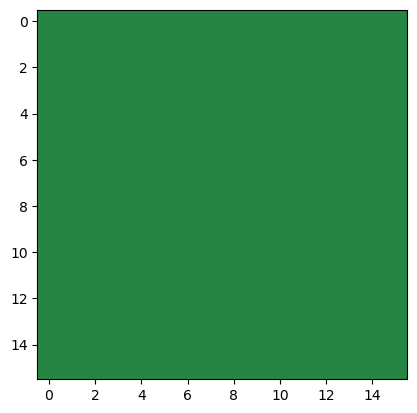

In [12]:
check_color(centers[1])

The green center is the 1st one

I use Pandas for data processing

In [13]:
df = pd.DataFrame(flattened_image, columns=['B', 'G', 'R'])

Add 'cluster' column by the 'prediction' variable for dataframe

In [14]:
df['cluster']=prediction

Set tuple (255,255,255) for the 0th and 2nd cluster

In [15]:
df.loc[df.cluster!=1, ['B', 'G', 'R']] = [255, 255, 255]

The flattenedly resulted image is:

In [18]:
resulted_image = df[['B', 'G', 'R']].values.reshape(image.shape)

In [19]:
cv2.imshow("", resulted_image)
cv2.waitKey(0)

-1

<b>Question: Why does the color of the resulting image differ from the color of the two trees and the grass in the given image?</b>

Thank you for reading !!!

Saigon - Thu Duc, rainy afternoon, my stomach growling with hunger!!! :D